In [ ]:
# код для матрицы ошибок
# Пример классификатора, способного проводить различие между всего лишь двумя
# классами, "пятерка" и "не пятерка" из набора рукописных цифр MNIST

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [5]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == 5) # True для всех пятерок, False для в сех остальных цифр. Задача опознать пятерки
y_test_5 = (y_test == 5)

In [6]:
sgd_clf = SGDClassifier(random_state=42) # классификатор на основе метода стохастического градиентного спуска (англ. Stochastic Gradient Descent SGD)
sgd_clf.fit(X_train, y_train_5) # обучаем классификатор распозновать пятерки на целом обучающем наборе

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
# Для расчета матрицы ошибок сначала понадобится иметь набор прогнозов, чтобы их можно было сравнивать с фактическими целями
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
print(confusion_matrix(y_train_5, y_train_pred))

[[53892   687]
 [ 1891  3530]]


In [8]:
y_train_perfect_predictions = y_train_5 # притворись, что мы достигли совершенства
print(confusion_matrix(y_train_5, y_train_perfect_predictions))

[[54579     0]
 [    0  5421]]


In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_5, y_train_pred)) # == (53892 + 3530) / (53892 + 3530  + 1891 +687)
# 0.9570333333333333

0.9570333333333333


In [10]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred)) # == 3530 / (3530 + 687)
print(recall_score(y_train_5, y_train_pred)) # == 3530 / (3530 + 1891)
# 0.8370879772350012
# 0.6511713705958311

0.8370879772350012
0.6511713705958311


In [11]:
from sklearn.metrics import f1_score
print(f1_score(y_train_5, y_train_pred))

0.7325171197343846


In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

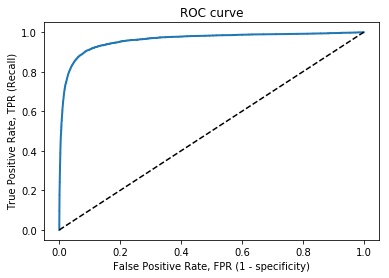

In [16]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel('False Positive Rate, FPR (1 - specificity)')
    plt.ylabel('True Positive Rate, TPR (Recall)')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
plot_roc_curve(fpr, tpr)
plt.show()